In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import os
import scvi
import sys 

sys.path.append('/mnt/ibm_lg/covid_tissue_atlas/CovidTissueAtlas/cta_utils/')
import utils

import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import ks_2samp
import anndata
import scanpy
import string
import seaborn as sns
import h5py
import tifffile
import fs
from fs import open_fs
from matplotlib_scalebar.scalebar import ScaleBar
from tqdm import tqdm

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\scvi\__init__.py:31: DeprecationWarning: scvi is deprecated, please uninstall scvi via `pip uninstall scvi` and install the new scvi-tools package at github.com/YosefLab/scvi-tools
  warnings.warn(deprecation_msg, DeprecationWarning)


In [2]:
df_gene_sets = pd.read_csv('C:/Users/joshu/Desktop/jupyter dotplots/LUOMA dotplot genes.csv')
df_gene_sets

,genes,Unnamed: 1
0,B cells,"CD79A, MS4A1, CD19"
1,T cells,CD3D
2,CD4T,"CD4, CD40LG, CD28"
3,CD8T,"CD8A, CD8B, LAG3"
4,GD,"TRGV4, TRDV1, TRGC2"
5,ILC3,"KRT86, KRT81, RORC"
6,NK,"KLRF1, KLRC1, GNLY, NCAM1"
7,cDC1,"CLEC10A, CD1D, CD1C"
8,cDC2,"C1orf54, CLEC9A, CLNK"
9,cycling,"HMGB2, MKI67, TYMS"


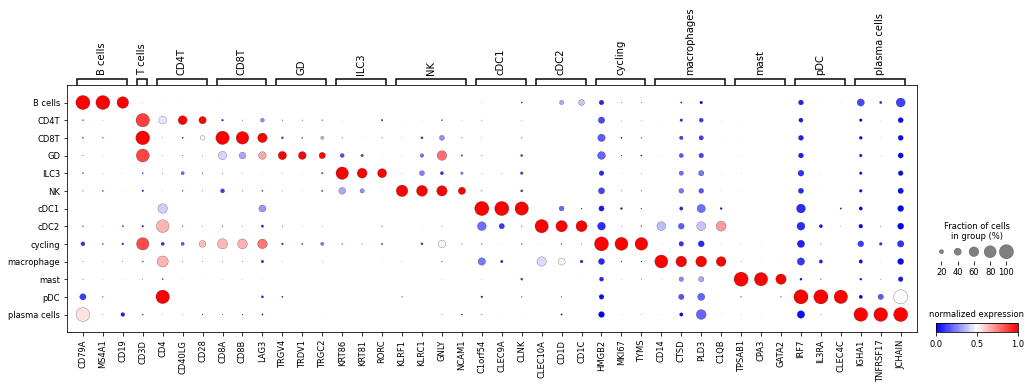

In [4]:
#CD45
adata = sc.read_h5ad('C:/Users/joshu/desktop/Luoma45_v2.h5ad')
list_clusters_coarse = adata.obs["anno"].unique()
adata45= adata[adata.obs['anno'].isin(['B cells', 'CD4T', 'CD8T', 'GD', 'ILC3',
                                        'NK', 'cDC1', 'cDC2', 'cycling', 'macrophage', 
                                        'mast', 'pDC', 'plasma cells'])]


df_gene_sets = pd.read_csv('C:/Users/joshu/Desktop/jupyter dotplots/LUOMA dotplot genes.csv')
gene_set_biopsies_coarse = df_gene_sets.iloc[0:14,:]

cell_types = gene_set_biopsies_coarse["genes"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata45, TS_marker_genes_coarse, groupby="anno", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'Luoma45.pdf')


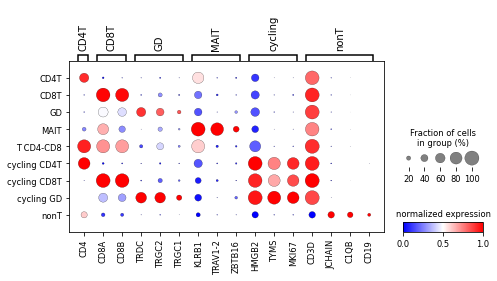

In [7]:
#CD3obj coarse
adata = sc.read_h5ad('C:/Users/joshu/desktop/Luoma3.h5ad')
list_clusters_coarse = adata.obs["annocoarse"].unique()


df_gene_sets = pd.read_csv('C:/Users/joshu/Desktop/jupyter dotplots/LUOMA dotplot genes.csv')
gene_set_biopsies_coarse = df_gene_sets.iloc[38:44,:]

cell_types = gene_set_biopsies_coarse["genes"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata, TS_marker_genes_coarse, groupby="annocoarse", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'Luoma3_coarse.pdf')


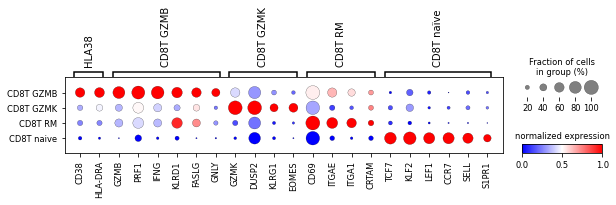

In [8]:
#CD8T
adata = sc.read_h5ad('C:/Users/joshu/desktop/Luoma3.h5ad')
list_clusters_coarse = adata.obs["anno"].unique()
adata8= adata[adata.obs['anno'].isin(['CD8T RM', 'CD8T GZMB', 'CD8T GZMK', 'CD8T naive'])]


df_gene_sets = pd.read_csv('C:/Users/joshu/Desktop/jupyter dotplots/LUOMA dotplot genes.csv')
gene_set_biopsies_coarse = df_gene_sets.iloc[25:30,:]

cell_types = gene_set_biopsies_coarse["genes"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata8, TS_marker_genes_coarse, groupby="anno", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'Luoma3_CD8T.pdf')


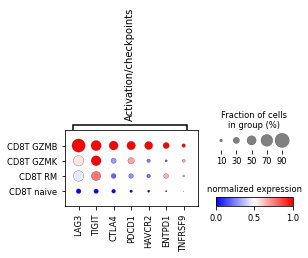

In [8]:
#CD8T
adata = sc.read_h5ad('C:/Users/joshu/desktop/Luoma3.h5ad')
list_clusters_coarse = adata.obs["anno"].unique()
adata8= adata[adata.obs['anno'].isin(['CD8T RM', 'CD8T GZMB', 'CD8T GZMK', 'CD8T naive'])]


df_gene_sets = pd.read_csv('C:/Users/joshu/Desktop/jupyter dotplots/LUOMA dotplot genes.csv')
gene_set_biopsies_coarse = df_gene_sets.iloc[30:31,:]

cell_types = gene_set_biopsies_coarse["genes"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata8, TS_marker_genes_coarse, groupby="anno", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'Luoma3_CD8Tact.pdf')


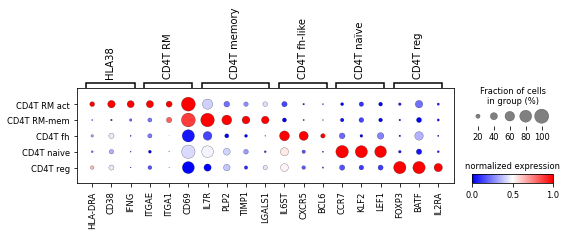

In [9]:
#CD4T
adata = sc.read_h5ad('C:/Users/joshu/desktop/Luoma3.h5ad')
list_clusters_coarse = adata.obs["anno"].unique()
adata4= adata[adata.obs['anno'].isin(['CD4T fh', 'CD4T RM-mem', 'CD4T naive', 'CD4T reg', 'CD4T RM act'])]



df_gene_sets = pd.read_csv('C:/Users/joshu/Desktop/jupyter dotplots/LUOMA dotplot genes.csv')
gene_set_biopsies_coarse = df_gene_sets.iloc[18:24,:]

cell_types = gene_set_biopsies_coarse["genes"]
cell_types = cell_types.tolist()
cell_type = cell_types[0]
gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
TS_marker_genes_coarse = {}
for i in range(0,len(cell_types)):
    # define the cell-type
    cell_type = cell_types[i]
    # extract the values along the row (cell-type)
    gene_list_temp = gene_set_biopsies_coarse[gene_set_biopsies_coarse['genes']==cell_type].iloc[0,1].split(', ')
#     # get rid of NaNs from the list
#     gene_list = [item for item in gene_list_temp if not (pd.isnull(gene_list_temp))]
    # match the key (cell-type) to the element (a list of marker genes)
    TS_marker_genes_coarse[cell_type] = gene_list_temp


sc.pl.dotplot(adata4, TS_marker_genes_coarse, groupby="anno", 
              colorbar_title='normalized expression',cmap='bwr', standard_scale='var',
              save= 'Luoma3_CD4T.pdf')


# ##UMAPS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
import os
import scvi
import sys 

sys.path.append('/mnt/ibm_lg/covid_tissue_atlas/CovidTissueAtlas/cta_utils/')
import utils

import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
from scipy.sparse import csr_matrix
from scipy.stats import ks_2samp
import anndata
import scanpy
import string
import seaborn as sns
import h5py
import tifffile
import fs
from fs import open_fs
from matplotlib_scalebar.scalebar import ScaleBar
from tqdm import tqdm

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [9]:
adata = sc.read_h5ad('C:/Users/joshu/desktop/all_h5ads/Luoma_CD45sorted_Final.h5ad')
list_clusters_coarse = adata.obs["anno"].unique()
adata.obs["anno"]

AAACCTGAGCGATCCC-1-0          B cells
AAACCTGAGTAAGTAC-1-0             CD8T
AAACCTGCAAGCGCTC-1-0             CD4T
AAACCTGCAATCAGAA-1-0       macrophage
AAACCTGCAGTGACAG-1-0             CD8T
                             ...     
TTTGTCACAACACCTA-1-15    plasma cells
TTTGTCACACCAGGTC-1-15    plasma cells
TTTGTCACAGAGCCAA-1-15    plasma cells
TTTGTCATCGCGTAGC-1-15              GD
TTTGTCATCTTGCATT-1-15            cDC2
Name: anno, Length: 52129, dtype: category
Categories (14, object): ['B cells', 'CD4T', 'CD8T', 'GD', ..., 'macrophage', 'mast', 'pDC', 'plasma cells']

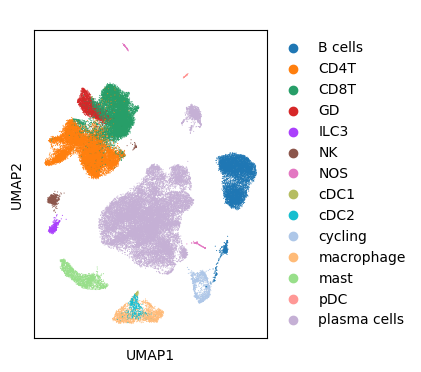

In [8]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (3,4)}):
      sc.pl.umap(adata, color=['anno'], title=" ",
                 save= '45 anno')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


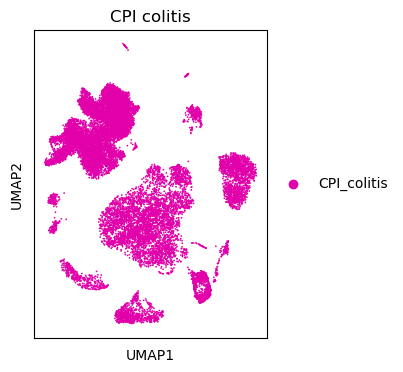

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


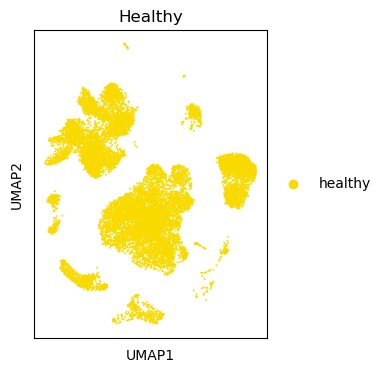

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


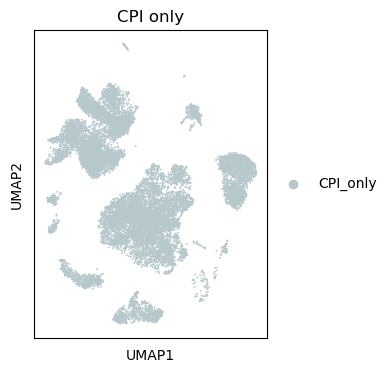

In [11]:
CPIcolitis_data= adata[adata.obs['disease'].isin(['CPI_colitis'])]
H_data= adata[adata.obs['disease'].isin(['healthy'])]
CPIonly_data= adata[adata.obs['disease'].isin(['CPI_only'])]

with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(CPIcolitis_data, color=['disease'], title='CPI colitis', 
                 palette={"healthy":"#F9DA00","CPI_only": "#b7c8cc","CPI_colitis": "#E100A9"},
                 save= '_Luoma45_CPIcolitis')

with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(H_data, color=['disease'], title='Healthy', 
                 palette={"healthy":"#F9DA00","CPI_only": "#b7c8cc","CPI_colitis": "#E100A9"},
                 save= '_Luoma45_healthy')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(CPIonly_data, color=['disease'], title='CPI only', 
                 palette={"healthy":"#F9DA00","CPI_only": "#b7c8cc","CPI_colitis": "#E100A9"},
                 save= '_Luoma45_CPIonly')


In [12]:
adata = sc.read_h5ad('C:/Users/joshu/desktop/all_h5ads/Luoma_CD3sorted_Final.h5ad')
list_clusters_coarse = adata.obs["anno"].unique()
adata.obs["anno"]

AAACCTGAGACTACAA-1-0        CD8T RM
AAACCTGGTAATCACC-1-0           nonT
AAACCTGTCCGCTGTT-1-0        CD8T RM
AAACCTGTCGAGCCCA-1-0        CD8T RM
AAACCTGTCGCTTAGA-1-0        CD8T RM
                            ...    
TTTGTCACAACGATGG-1-21       CD8T RM
TTTGTCACATCGATTG-1-21    CD8T naive
TTTGTCAGTTAAGATG-1-21    CD4T naive
TTTGTCATCTGGAGCC-1-21       CD8T RM
TTTGTCATCTTGGGTA-1-21       CD8T RM
Name: anno, Length: 70382, dtype: category
Categories (16, object): ['CD4T RM act', 'CD4T RM-mem', 'CD4T fh', 'CD4T naive', ..., 'cycling CD4T', 'cycling CD8T', 'cycling GD', 'nonT']

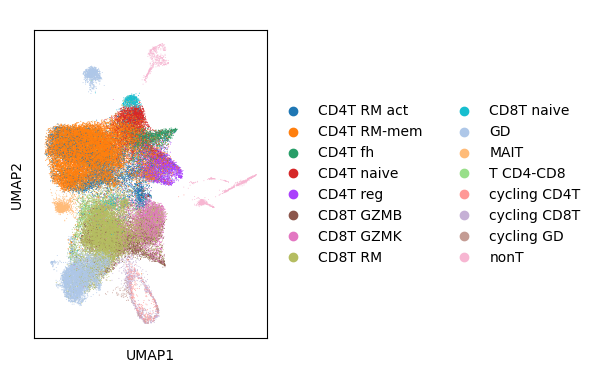

In [8]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (3,4)}):
      sc.pl.umap(adata, color=['anno'], title=" ",
                 save= '3 anno')

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


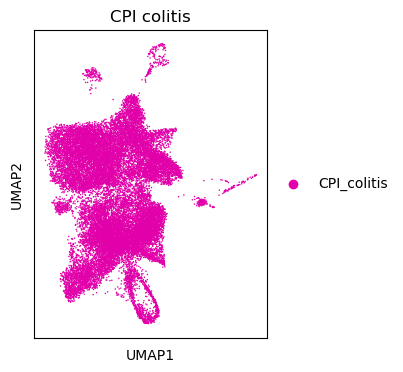

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


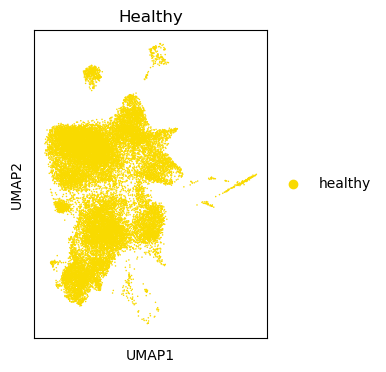

C:\Users\joshu\miniconda3\envs\cxg\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


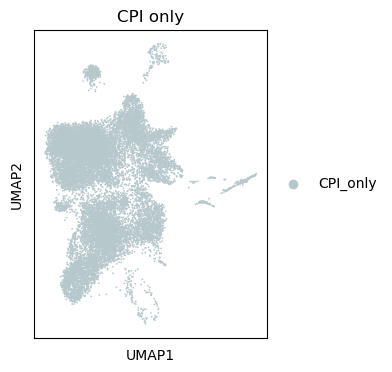

In [13]:
CPIcolitis_data= adata[adata.obs['disease'].isin(['CPI_colitis'])]
H_data= adata[adata.obs['disease'].isin(['healthy'])]
CPIonly_data= adata[adata.obs['disease'].isin(['CPI_only'])]

with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(CPIcolitis_data, color=['disease'], title='CPI colitis', 
                 palette={"healthy":"#F9DA00","CPI_only": "#b7c8cc","CPI_colitis": "#E100A9"},
                 save= '_Luoma3_CPIcolitis')

with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(H_data, color=['disease'], title='Healthy', 
                 palette={"healthy":"#F9DA00","CPI_only": "#b7c8cc","CPI_colitis": "#E100A9"},
                 save= '_Luoma3_healthy')
        
with rc_context({'figure.figsize': (3, 4)}):
      sc.pl.umap(CPIonly_data, color=['disease'], title='CPI only', 
                 palette={"healthy":"#F9DA00","CPI_only": "#b7c8cc","CPI_colitis": "#E100A9"},
                 save= '_Luoma3_CPIonly')

 # # CSV metadata output
    

In [2]:
adata = sc.read_h5ad('C:/Users/joshu/desktop/Luoma3.h5ad')


In [3]:
adata


AnnData object with n_obs × n_vars = 70382 × 22297
    obs: 'anno', 'annocoarse', 'CPI', 'disease', 'doublet_scores', 'leiden', 'louvain', 'MES', 'n_counts', 'n_genes', 'percent_mito', 'percent_ribo', 'platelet', 'predicted_doublets', 'RBC', 'sample_ID', 'TNF_required', 'coarse'
    var: 'gene_ids', 'feature_types', 'rna', 'n_cells'
    obsm: 'X_umap'
    layers: 'counts'

In [15]:
adata.obs['sample_ID'].unique()
#adata.obs['anno'].unique()
#adata.obs['disease'].unique()
#adata.obs['CPI'].unique()
#adata.obs['TNF_required'].unique()
#adata.obs['MES'].unique()




['C1-CD3', 'C2-CD3', 'C3-CD3', 'C4-CD3', 'C5-CD3', ..., 'NC2-CD3', 'NC3-CD3', 'NC4-CD3', 'NC5-CD3', 'NC6-CD3']
Length: 22
Categories (22, object): ['C1-CD3', 'C2-CD3', 'C3-CD3', 'C4-CD3', ..., 'NC3-CD3', 'NC4-CD3', 'NC5-CD3', 'NC6-CD3']

In [16]:
adata.obs[['sample_ID','anno', 'disease', 'CPI', 'TNF_required', 'MES']].to_csv('Luoma3_barcode_metadata.csv')